**Load, Split dataset and Scaling** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv')

# Split Dataset into X and Y
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

# Split the X and Y Dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fit SVM to the Training set**

In [2]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [3]:
#Predict the Test Set Results
y_pred = classifier.predict(X_test)

**Make the Confusion Matrix**

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[ 594  895   37  600  843]
 [ 182 7906  885  559  283]
 [  10 1507 3725   18   32]
 [ 149 1004   58 2882  128]
 [ 285  273   36  115 4107]]
              precision    recall  f1-score   support

          N1       0.49      0.20      0.28      2969
          N2       0.68      0.81      0.74      9815
          N3       0.79      0.70      0.74      5292
           R       0.69      0.68      0.69      4221
           W       0.76      0.85      0.80      4816

    accuracy                           0.71     27113
   macro avg       0.68      0.65      0.65     27113
weighted avg       0.70      0.71      0.69     27113

Accurecy:  0.7086637406410209


Text(69.0, 0.5, 'Truth')

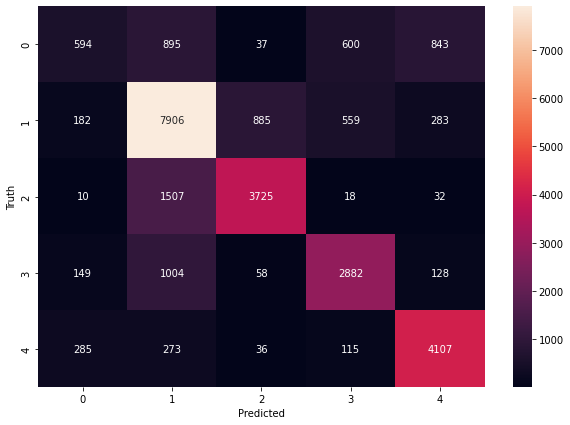

In [10]:
cm =confusion_matrix(y_test,y_pred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted')
plt.ylabel('Truth')